In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sklearn
import tqdm
from tqdm import tqdm
import nltk
import warnings
warnings.filterwarnings("ignore") 
import cv2

In [17]:
print("there are {} number of reports in the data ".format(len(os.listdir("NLMCXR_reports/ecgen-radiology"))))
print("there are {} number of x-rays in the data ".format(len(os.listdir("NLMCXR_png")))) 

there are 3955 number of reports in the data 
there are 7471 number of x-rays in the data 


In [18]:

import xml.etree.ElementTree as et
id=[]
finding=[]
count=[]
indication=[]
impression=[]

for report in tqdm(os.listdir("NLMCXR_reports/ecgen-radiology")):
  #create element tree object
  tree=et.parse("NLMCXR_reports/ecgen-radiology/"+report)
  #get the root element
  root=tree.getroot()
  #inside the root element
  for child in root:
      if child.tag == "MedlineCitation":
          for each in child:
              if each.tag == "Article":
                  for i in each:
                      if i.tag == "Abstract":
                          for j in i:

                            if j.get('Label')=='INDICATION':
                              indic=j.text
                              
                            if j.get("Label") == "FINDINGS":
                              find = j.text
                                
                            if j.get('Label')=='IMPRESSION':
                              
                              impr=j.text
                              
                                       
  image_count=0 #this is to find the number of x-rays in each report 
  for img_id in root.findall("parentImage"):
    id.append(img_id.get("id")+".png")
    finding.append(find)
    impression.append(impr)
    indication.append(indic)
    image_count+=1
  count.append(image_count)  

100%|██████████| 3955/3955 [00:45<00:00, 86.39it/s] 


In [19]:
df=pd.DataFrame()
patient_id=[i[:-9] for i in id]
df["patient_id"]=patient_id
df["image_id"]=["NLMCXR_png/"+ i for i in id]
df["finding"]=finding
df["impression"]=impression
df["indication"]=indication

print(df.shape)
df

(7470, 5)


,patient_id,image_id,finding,impression,indication
0,CXR1_1_IM-0001,NLMCXR_png/CXR1_1_IM-0001-3001.png,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,Positive TB test
1,CXR1_1_IM-0001,NLMCXR_png/CXR1_1_IM-0001-4001.png,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,Positive TB test
2,CXR10_IM-0002,NLMCXR_png/CXR10_IM-0002-1001.png,The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,"XXXX-year-old male, chest pain."
3,CXR10_IM-0002,NLMCXR_png/CXR10_IM-0002-2001.png,The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,"XXXX-year-old male, chest pain."
4,CXR100_IM-0002,NLMCXR_png/CXR100_IM-0002-1001.png,Both lungs are clear and expanded. Heart and m...,No active disease.,None
...,...,...,...,...,...
7465,CXR998_IM-2479,NLMCXR_png/CXR998_IM-2479-1001.png,Cardiomediastinal silhouette demonstrates norm...,No acute cardiopulmonary abnormality.,XXXX-year-old XXXX with pain.
7466,CXR998_IM-2479,NLMCXR_png/CXR998_IM-2479-2001.png,Cardiomediastinal silhouette demonstrates norm...,No acute cardiopulmonary abnormality.,XXXX-year-old XXXX with pain.
7467,CXR999_IM-2480,NLMCXR_png/CXR999_IM-2480-1001.png,Lungs are clear bilaterally. There is no focal...,No acute cardiopulmonary abnormality.,Chest pain
7468,CXR999_IM-2480,NLMCXR_png/CXR999_IM-2480-2001.png,Lungs are clear bilaterally. There is no focal...,No acute cardiopulmonary abnormality.,Chest pain


In [20]:

#check the lengths of reports
length=[]
for report in df["finding"]:
  try:
    length.append(len(report.split()))
  except:
    pass
length=np.array(length)
print("the mean lengths of reports is ",np.mean(length))
print("the 80th percentile lengths of reports is ",np.percentile(length,80))
print("the 90th percentile lengths of reports is ",np.percentile(length,90))
print("the 99th percentile lengths of reports is ",np.percentile(length,99))
print("the maximum value of lengths of reports is ",np.max(length))

the mean lengths of reports is  31.32164375096555
the 80th percentile lengths of reports is  41.0
the 90th percentile lengths of reports is  50.0
the 99th percentile lengths of reports is  79.0
the maximum value of lengths of reports is  169


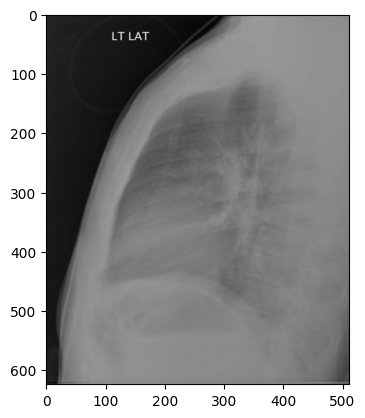

FINDINGS: The cardiomediastinal silhouette is within normal limits for appearance. No focal areas of pulmonary consolidation. No interval change in the appearance of the XXXX opacities in the bilateral lower lobes. No pneumothorax. No pleural effusion. The thoracic spine appears intact.
IMPRESSION: 1. No interval change in the appearance of the XXXX opacities in the bilateral lower lobes.
INDICATION: XXXX-year-old male suspected pneumonia.
****************************************************************************************************


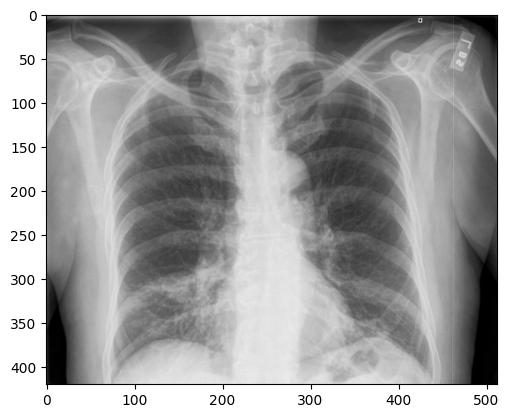

FINDINGS: The lungs are hyperexpanded consistent with emphysema. The heart size and pulmonary vascularity appear within normal limits. No pneumothorax or pleural effusion is seen. Patchy airspace disease is present in the right middle lobe. Degenerative changes are present spine.
IMPRESSION: 1. Hyperexpanded lungs suggesting emphysema. 2. Patchy right middle lobe airspace disease. May represent pneumonia. Followup examination is suggested following treatment to confirm clearing of the opacities. A 4 to 6 XXXX post treatment interval film would be reasonable to allow clearing of inflammatory opacities.
INDICATION: XXXX
****************************************************************************************************


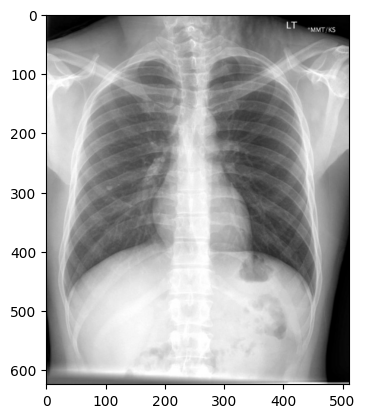

FINDINGS: The trachea is midline. Cardiomediastinal silhouette is normal and unchanged from prior examination. There are round calcific densities in the right lung consistent with prior granulomatous disease. Otherwise, the lungs are clear without evidence of acute infiltrate or effusion. There is no pneumothorax. The visualized bony structures reveal no acute abnormalities.
IMPRESSION: No acute cardiopulmonary abnormalities.
INDICATION: chest pain
****************************************************************************************************


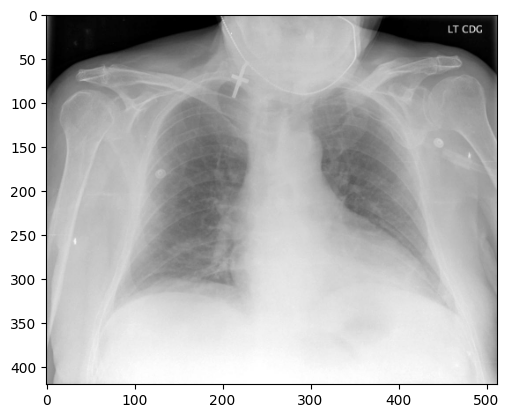

FINDINGS: Low lung volumes with bibasilar subsegmental atelectasis. No focal consolidations, pleural effusions, or pneumothoraces. Cardiomediastinal silhouette is within normal limits. Degenerative changes of the thoracic spine.
IMPRESSION: No acute cardiopulmonary abnormality.
INDICATION: Chest pain
****************************************************************************************************


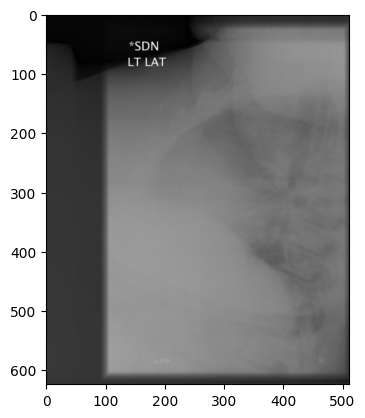

FINDINGS: Stable cardiomegaly with significantly low lung volumes and associated bronchovascular crowding and bibasilar atelectasis. No definite pleural effusion, consolidation, or pneumothorax identified. No acute bony abnormality.
IMPRESSION: Limited examination with stable cardiomegaly and low lung volumes without acute cardiopulmonary abnormality identified.
INDICATION: XXXX-year-old woman with chest pain and shortness of breath..
****************************************************************************************************


In [21]:
#print some sample x-rays and findings
a=np.random.choice(range(7470),5)
for each in a:
  img=cv2.imread(df.iloc[each]["image_id"])
  plt.imshow(img)
  plt.show()
  print("FINDINGS:",df.iloc[each]["finding"])
  print("IMPRESSION:",df.iloc[each]["impression"])
  print("INDICATION:",df.iloc[each]["indication"])
  print("*"*100)

In [23]:
#finding the number of reports were findings is none
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))

there are 997 number of records where finding is none


In [24]:
for i in range(df.shape[0]):
  if finding[i] is None:
    
    finding[i]=impression[i]
    

df["finding"]=finding
     

In [25]:
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))

there are 40 number of records where finding is none


In [26]:
df=df.dropna()
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))
df=df.drop(["impression","indication"],axis=1)

there are 0 number of records where finding is none


In [27]:
df

,patient_id,image_id,finding
0,CXR1_1_IM-0001,NLMCXR_png/CXR1_1_IM-0001-3001.png,The cardiac silhouette and mediastinum size ar...
1,CXR1_1_IM-0001,NLMCXR_png/CXR1_1_IM-0001-4001.png,The cardiac silhouette and mediastinum size ar...
2,CXR10_IM-0002,NLMCXR_png/CXR10_IM-0002-1001.png,The cardiomediastinal silhouette is within nor...
3,CXR10_IM-0002,NLMCXR_png/CXR10_IM-0002-2001.png,The cardiomediastinal silhouette is within nor...
6,CXR1000_IM-0003,NLMCXR_png/CXR1000_IM-0003-1001.png,There is XXXX increased opacity within the rig...
...,...,...,...
7465,CXR998_IM-2479,NLMCXR_png/CXR998_IM-2479-1001.png,Cardiomediastinal silhouette demonstrates norm...
7466,CXR998_IM-2479,NLMCXR_png/CXR998_IM-2479-2001.png,Cardiomediastinal silhouette demonstrates norm...
7467,CXR999_IM-2480,NLMCXR_png/CXR999_IM-2480-1001.png,Lungs are clear bilaterally. There is no focal...
7468,CXR999_IM-2480,NLMCXR_png/CXR999_IM-2480-2001.png,Lungs are clear bilaterally. There is no focal...


dict_values([2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 

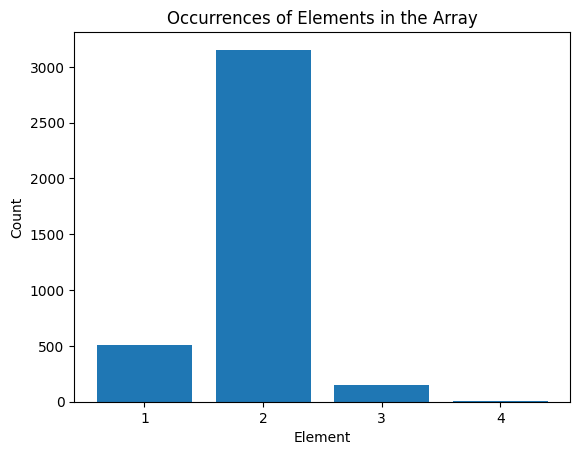

In [33]:
d=dict()
for patient in df["patient_id"]:
  if patient in d:
    d[patient]+=1
  else:
    d[patient]=1
print(d.values())
count=list(d.values())
counts = np.bincount(count)
# print(count)
# sns.countplot(count)
# plt.title("number of image per patient ")
labels = [str(i) for i in range(1, len(counts))]
plt.bar(labels, counts[1:])
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Occurrences of Elements in the Array')
plt.show()

In [35]:
import xml.etree.ElementTree as et
img=[]

for report in tqdm(os.listdir("NLMCXR_reports/ecgen-radiology")):
  #create element tree object
  tree=et.parse("NLMCXR_reports/ecgen-radiology/"+report)
  
  root=tree.getroot()
  
  
  if len(root.findall("parentImage"))>3:
    for img_id in root.findall("parentImage"):
    
      img.append(img_id.get("id")+".png")
  
    break


  0%|          | 19/3955 [00:00<00:04, 858.85it/s]


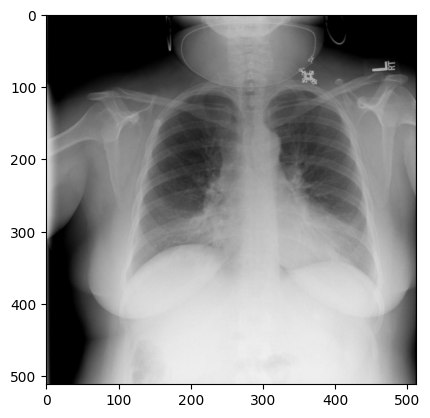

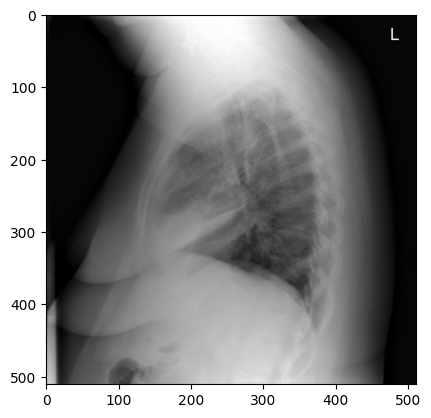

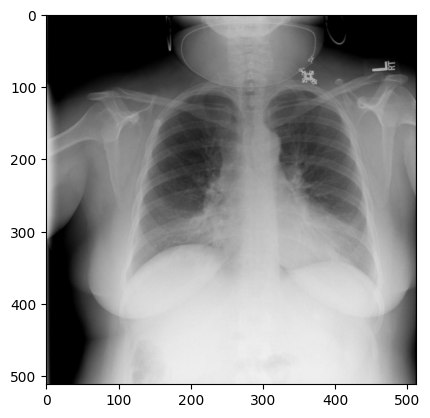

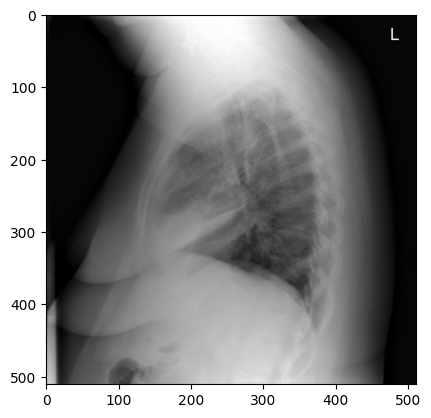

In [36]:
for i in img:
  image=cv2.imread("NLMCXR_png/"+i)
  plt.imshow(image)
  plt.show()

In [38]:
d=dict() #where key is the patient id and value is the images
d1=dict() # where key is the patient id and value is the report or findings
for row in range(df.shape[0]):
  if df.iloc[row]["patient_id"] in d:
    d[df.iloc[row]["patient_id"]].append(df.iloc[row]["image_id"])
  else:
    d[df.iloc[row]["patient_id"]]=[df.iloc[row]["image_id"]]

  d1[df.iloc[row]["patient_id"]]=[df.iloc[row]["finding"]]
     

In [39]:
#images and findings associated with the first patient
print(d["CXR3676_IM-1829-0001"])
print(d1["CXR3676_IM-1829-0001"])
     

['NLMCXR_png/CXR3676_IM-1829-0001-0001.png', 'NLMCXR_png/CXR3676_IM-1829-0001-0002.png']
["The cardiomediastinal silhouette appears irregular secondary to the diffuse bilateral pulmonary interstitial disease. The thoracic aorta is tortuous. Calcified lymph XXXX are demonstrated in the left hilum. No focal pulmonary consolidation. Diffuse increased bilateral pulmonary interstitial markings, consistent with the patient's history of known pulmonary fibrosis, with relative sparing of the bilateral lung apices. No pneumothorax or pleural effusion demonstrated. The thoracic spine appears intact."]


In [41]:
image1=[]
image2=[]
report=[]
patient_id=[]
for patient in d.keys():

  #if there is only one image for a person
  if len(d[patient])==1:
    img1=d[patient][0]
    img2=d[patient][0]

  #if there are two images for a person
  elif len(d[patient])==2:
    img1=d[patient][0]
    img2=d[patient][1]
  
  #if there are three images for a person
  elif len(d[patient])==3:
    a=np.random.choice([0,1,2],2)
    img1=d[patient][a[0]]
    img2=d[patient][a[1]]

  #if there are four images for a person
  elif len(d[patient])==4:
    a=np.random.choice([0,1,2,3],2)
    img1=d[patient][a[0]]
    img2=d[patient][a[1]]
    
  image1.append(img1)
  image2.append(img2)
  report.append(d1[patient][0])
  patient_id.append(patient)

In [42]:
df_dash=pd.DataFrame()
df_dash["patient_id"]=patient_id
df_dash["image1"]=image1
df_dash["image2"]=image2
df_dash["report"]=report
df_dash
     

,patient_id,image1,image2,report
0,CXR1_1_IM-0001,NLMCXR_png/CXR1_1_IM-0001-3001.png,NLMCXR_png/CXR1_1_IM-0001-4001.png,The cardiac silhouette and mediastinum size ar...
1,CXR10_IM-0002,NLMCXR_png/CXR10_IM-0002-1001.png,NLMCXR_png/CXR10_IM-0002-2001.png,The cardiomediastinal silhouette is within nor...
2,CXR1000_IM-0003,NLMCXR_png/CXR1000_IM-0003-2001.png,NLMCXR_png/CXR1000_IM-0003-1001.png,There is XXXX increased opacity within the rig...
3,CXR1001_IM-0004,NLMCXR_png/CXR1001_IM-0004-1001.png,NLMCXR_png/CXR1001_IM-0004-1002.png,Interstitial markings are diffusely prominent ...
4,CXR1002_IM-0004,NLMCXR_png/CXR1002_IM-0004-1001.png,NLMCXR_png/CXR1002_IM-0004-2001.png,Status post left mastectomy. Heart size normal...
...,...,...,...,...
3815,CXR995_IM-2478,NLMCXR_png/CXR995_IM-2478-1001.png,NLMCXR_png/CXR995_IM-2478-1002.png,Sternotomy sutures and bypass grafts have been...
3816,CXR996_IM-2479,NLMCXR_png/CXR996_IM-2479-1001.png,NLMCXR_png/CXR996_IM-2479-2001.png,Heart size is normal and lungs are clear. No p...
3817,CXR997_IM-2479,NLMCXR_png/CXR997_IM-2479-1001.png,NLMCXR_png/CXR997_IM-2479-2001.png,Calcified mediastinal XXXX. No focal areas of ...
3818,CXR998_IM-2479,NLMCXR_png/CXR998_IM-2479-1001.png,NLMCXR_png/CXR998_IM-2479-2001.png,Cardiomediastinal silhouette demonstrates norm...


In [43]:
#  some sample report
print(df_dash["report"].values[:10])

['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.'
 'The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality..'
 'There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality.'
 'Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.'
 'Status post left mastectomy. 

In [44]:
#convert into lowercase
finding=df_dash["report"].values
for idx in tqdm(range(len(finding))):
    
    lower=finding[idx].lower()
    finding[idx]=lower
  
df_dash["report"]=finding


100%|██████████| 3820/3820 [00:00<00:00, 1085591.25it/s]


In [45]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



finding=df_dash["report"].values
for idx in tqdm(range(len(finding))):
  list_of_words=finding[idx].split(" ")
  
  sentence=""
  for i in list_of_words:
    
    if len(i)>2:
      
      if i in list(contractions.keys()):
        wrd=contractions[i]
      else:
        wrd=i
      
      sentence+=wrd+" "
    else:
      continue
  finding[idx]=sentence

100%|██████████| 3820/3820 [00:00<00:00, 12214.49it/s]


In [46]:
'''Now we remove all the special characters, and digits from the report. also remove the extra spaces in the sentence. Also there
are some words like xxx. These words are not giving any additional meaning to the report. So we remove those words
'''

for idx in tqdm(range(len(finding))):
    
  report=re.sub("[^a-z.]"," ",finding[idx])
  report=re.sub("xx+","",report)
  report=re.sub(r'\b\w{1,2}\b',"",report) #some unwanted words came up which are having lenbth<2. They are also removed
  report=re.sub("\s\s+"," ",report)
  finding[idx]=report 
print("\n")


100%|██████████| 3820/3820 [00:00<00:00, 46514.08it/s]

In [47]:
for i in finding[:10]:
  print(i)

the cardiac silhouette and mediastinum size are within normal limits. there pulmonary edema. there focal consolidation. there are pleural effusion. there evidence pneumothorax. 
the cardiomediastinal silhouette within normal limits for size and contour. the lungs are normally inflated without evidence focal airspace disease pleural effusion pneumothorax. stable calcified granuloma within the right upper lung. acute bone abnormality.. 
there increased opacity within the right upper lobe with possible mass and associated area atelectasis focal consolidation. the cardiac silhouette within normal limits. opacity the left midlung overlying the posterior left rib may represent focal airspace disease. pleural effusion pneumothorax. acute bone abnormality. 
interstitial markings are diffusely prominent throughout both lungs. heart size normal. pulmonary normal. 
status post left mastectomy. heart size normal. lungs are clear. 
heart size and pulmonary vascularity appear within normal limits. r

In [ ]:
df_dash["report"]=finding
df_dash.to_csv("data.csv")